# Previsão de Vendas


Autora: Luana Fraga de Andrade Araujo

E-mail: luafraga1@hotmail.com

LinkedIn: www.linkedin.com/in/luana-fraga-63a794193/

Github: https://github.com/luanafraga

# Objetivo do projeto

O objetivo deste projeto é **criar um modelo de previsão de vendas** a partir do histórico de investimentos em marketing em diferentes canais: TV, Jornal e Rádio. 

TV, Jornal e Rádio estão em milhares de reais e Vendas estão em milhões

# Base de Dados

A base de dados possui informações sobre:

   - **TV**: Valores investidos no meio de comunicação TV (em milhares de reais)
   - **Radio**: Valores investidos no meio de comunicação Rádio (em milhares de reais)
   - **Jornal**: Valores investidos no meio de comunicação Jornal (em milhares de reais)
   - **Vendas**: Valores realizados em vendas (em milhões de reais)

# Importação de pacotes

In [1]:
import pandas as pd
import numpy as np

#para visualização dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# para criação e validação dos modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# para garantir a replicabilidade do código
SEED = 1

In [3]:
#definindo paleta e estilo dos gráficos
sns.set_palette('pastel')
sns.set_style('white')

# Leitura dos dados

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [5]:
dados = pd.read_csv("advertising.csv")
dados

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
print(f'Nosso Conjunto de Dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

Nosso Conjunto de Dados tem 200 linhas e 4 colunas.


# Informações do DataFrame

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Jornal,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Vendas,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


Para começar a análise, vamos utilizar o método **.describe()** para entender alguns métodos estatísticos que temos dentro da base de dados. O método describe() fornece as informações sobre:

- Para variáveis **quantitativas**:

   - **count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

   - **mean** - O valor médio, em média aritmética. 

   - **std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

   - **min e max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

   - **quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

In [9]:
duplicados = dados.duplicated().sum()
duplicados

0

In [10]:
nulos = dados.isna().sum().sum()
nulos

0

In [11]:
print(f'Contém {duplicados} dados duplicados e {nulos} dados nulos.')

Contém 0 dados duplicados e 0 dados nulos.


# Análise Exploratória

Inicialmente iremos verificar os **valores totais investidos em cada meio de comunicação** e sua distribuição. Também calcularemos o **valor total de vendas** obtidas.

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Investimentos em TV'}, xlabel='TV'>

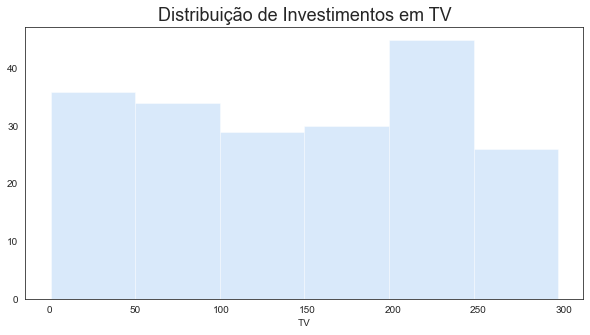

In [12]:
plt.figure(figsize = (10,5))
plt.title('Distribuição de Investimentos em TV', fontsize=18)
sns.distplot(dados.TV, kde=False)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Investimentos em Rádio'}, xlabel='Radio'>

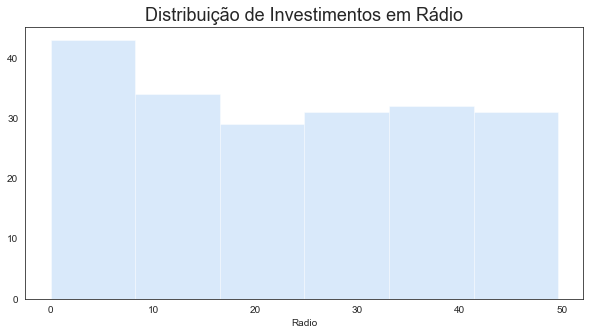

In [60]:
plt.figure(figsize = (10,5))
plt.title('Distribuição de Investimentos em Rádio', fontsize=18)
sns.distplot(dados.Radio, kde=False)

<AxesSubplot:title={'center':'Distribuição de Investimentos em Jornal'}, xlabel='Jornal'>

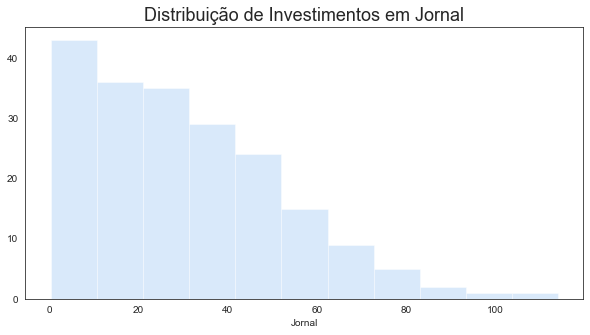

In [14]:
plt.figure(figsize = (10,5))
plt.title('Distribuição de Investimentos em Jornal', fontsize=18)
sns.distplot(dados.Jornal, kde=False)

<AxesSubplot:title={'center':'Distribuição de Vendas'}, xlabel='Vendas'>

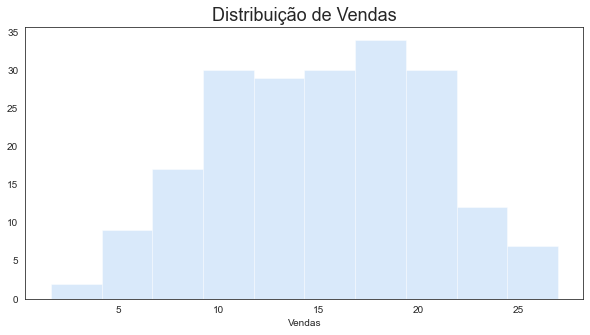

In [15]:
plt.figure(figsize = (10,5))
plt.title('Distribuição de Vendas', fontsize=18)
sns.distplot(dados.Vendas, kde=False)

In [35]:
df = dados.sum()
df

TV        29408.5
Radio      4652.8
Jornal     6110.8
Vendas     3026.1
dtype: float64

In [41]:
df = pd.DataFrame(df).T
df

,TV,Radio,Jornal,Vendas
0,29408.5,4652.8,6110.8,3026.1


In [51]:
df1 = df[['TV', 'Radio', 'Jornal']]
df1

,TV,Radio,Jornal
0,29408.5,4652.8,6110.8


<AxesSubplot:title={'center':'Valores investidos em meios de comunicação (em milhares)'}>

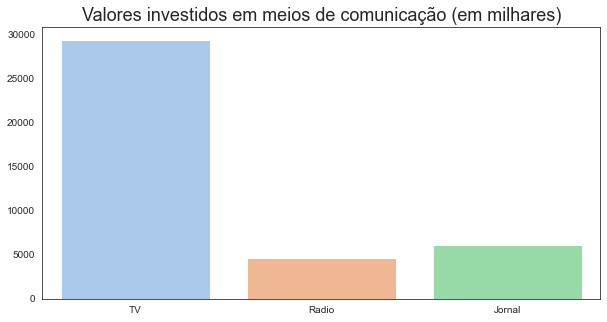

In [58]:
plt.figure(figsize = (10,5))
plt.title('Valores investidos em meios de comunicação (em milhares)', fontsize=18)
sns.barplot(data=df1)

In [53]:
df2 = df[['Vendas']]
df2

,Vendas
0,3026.1


<AxesSubplot:title={'center':'Valores total de vendas (em milhões)'}>

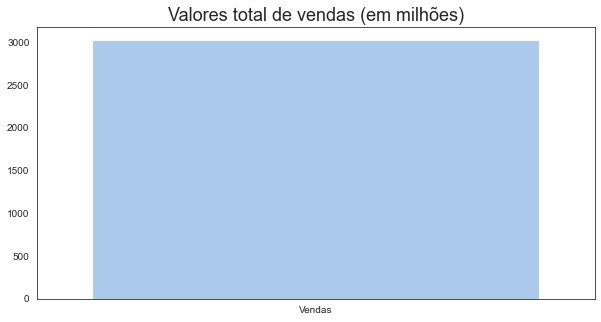

In [59]:
plt.figure(figsize = (10,5))
plt.title('Valores total de vendas (em milhões)', fontsize=18)
sns.barplot(data=df2)

**Investimentos totais realizados:** 
   - TV - 29.408.000,50 
   - Radio - 4.652.800,00
   - Jornal - 6.110.800,00
    
**Total de vendas acumuladas:** 
   - 3.026.100.000,00

# Matriz de Correlação

Iremos explorar o nosso conjunto de dados tentando encontrar **correlações** entre nosso atributo **Vendas** e o restante das variáveis.

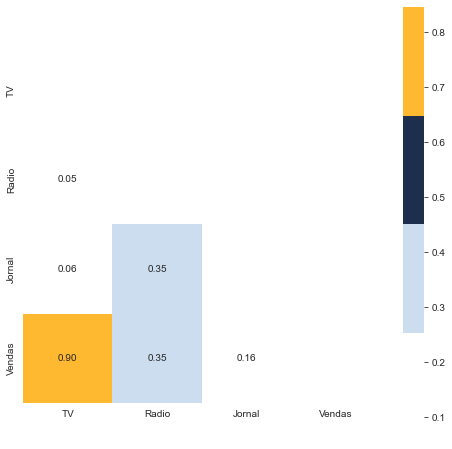

In [19]:
matrix_corr = dados.corr().abs()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(matrix_corr, mask=mask, square=True, cmap=['#ffffff','#ccddef','#1e2f4d','#feb930'], center=0.45, robust=True, annot= True, fmt=".2f")

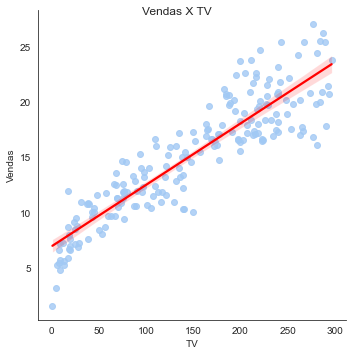

In [20]:
ax = sns.lmplot(x='TV', y='Vendas', data=dados,
          line_kws={'color':'red'})
ax.fig.suptitle('Vendas X TV')
plt.show()

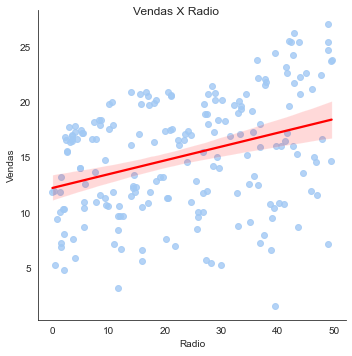

In [21]:
ax = sns.lmplot(x='Radio', y='Vendas', data=dados,
          line_kws={'color':'red'})
ax.fig.suptitle('Vendas X Radio')
plt.show()

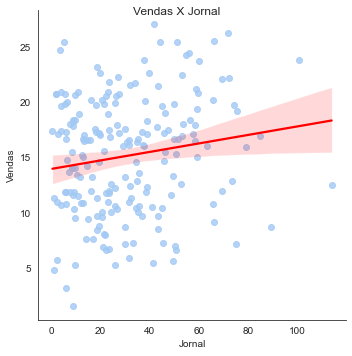

In [22]:
ax = sns.lmplot(x='Jornal', y='Vendas', data=dados,
          line_kws={'color':'red'})
ax.fig.suptitle('Vendas X Jornal')
plt.show()

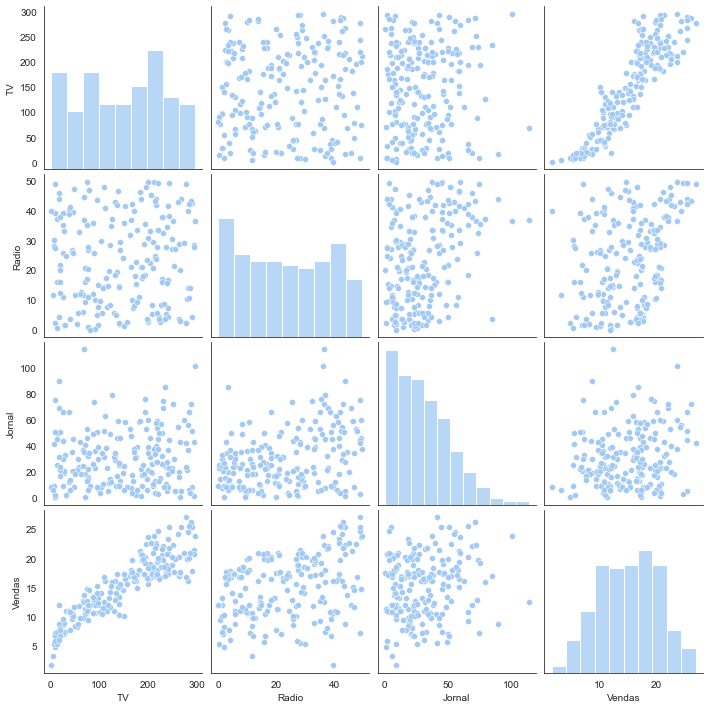

In [23]:
sns.pairplot(dados)
plt.show()

Conseguimos verificar que o meio de comunicação com **maior correlação com as vendas é a TV**. Este deve ser maior foco nos investimentos em marketing.

# Machine Learning - Utilizando algoritmos de Regressão


## Definindo as features (dados de entrada) e os labels (dados de saída)

In [24]:
y = dados["Vendas"]
x = dados.drop("Vendas", axis=1)

## Bases de treino e teste

In [25]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=SEED)

## Vamos utilizar 2 modelos de regressão:

- Regressão Linear
- Árvore de Decisão

In [26]:
# criando o modelo
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinando o modelo
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

# criando as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

## Avaliação do Melhor Modelo

- Vamos utilizar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [27]:
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684273
0.9633564655853577


O valor de R² da **Árvore de Decisão** é MAIOR que o valor da regressão linear. Utilizaremos então este modelo.

## Visualização Gráfica das Previsões

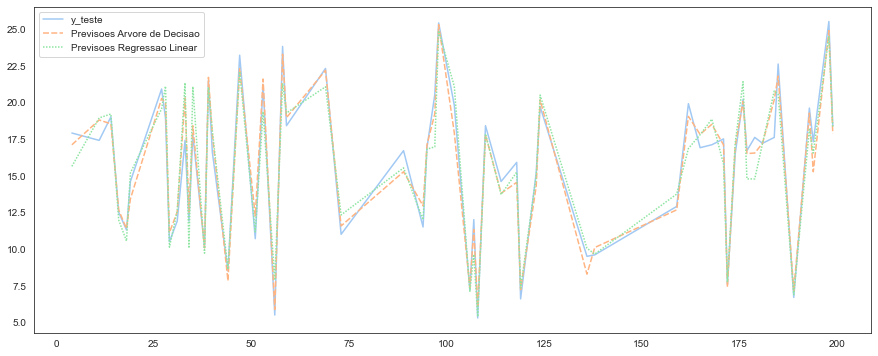

In [28]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes Arvore de Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

## Fazendo previsão de vendas com dados de investimentos da tabela "novos"

In [29]:
dados2 = pd.read_csv("novos.csv")
dados2

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [30]:
previsao = modelo_arvoredecisao.predict(dados2)
previsao

array([ 7.611,  8.629, 20.067])

# Conclusões

## A importância de cada variável para as vendas

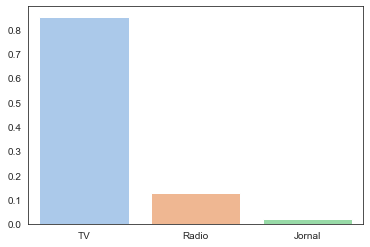

In [31]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

Na análise inicial realizada percebemos que o investimento em **TV** era o que possuía maior correlação com as vendas.
Podemos perceber que em termos de importância para o modelo via Árvore de Decisão:
- **O investimento em TV é ~85% relevante;**
- **O Rádio que também avaliamos anteriormente, pouco mais de 10%;**
- **Jornal não chegando a mais de 5% de relevância**